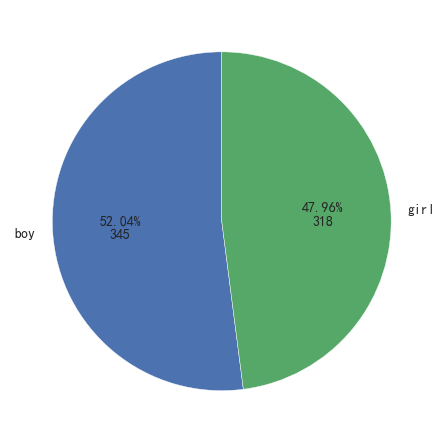

In [103]:
# plt.pie(values, labels=labels, startangle=90, autopct=lambda x: compute_fraction(x,values));

In [99]:
labels=['boy','girl']
values=np.array([gender_stats_by_user[0], gender_stats_by_user[1]])
values

array([345, 318], dtype=int64)

In [100]:
gender_stats_by_user

gender
0    345
1    318
Name: user_id, dtype: int64

In [98]:
gender_stats_by_user = df_merge.groupby(by = "gender")["user_id"].count()

In [97]:
# 计算比例函数
def compute_fraction(pct, allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return '{:.2f}%\n{:d}'.format(pct, absolute)

In [96]:
df_merge = df_merge[df_merge.age > 0]
df_merge.age.describe()

count    663.000000
mean       1.537979
std        1.122517
min        0.020000
25%        0.590000
50%        1.250000
75%        2.300000
max        4.840000
Name: age, dtype: float64

In [95]:
df_merge['age'] = round(( df_merge['day'] - df_merge['birthday'] ) / pd.Timedelta(days = 365) , 2)
df_merge

,user_id,auction_id,category_2,category_1,buy_mount,day,year,quarter,month,birthday,gender,age
0,513441334,19909384116,50010557,50008168,1,2012-12-12,2012,4,12,2011-01-05,1,1.94
1,377550424,15771663914,50015841,28,1,2012-11-23,2012,4,11,2011-06-20,1,1.43
2,47342027,14066344263,50013636,50008168,1,2012-09-11,2012,3,9,2010-10-08,1,1.93
3,119784861,20796936076,50140021,50008168,1,2012-11-29,2012,4,11,2012-03-27,0,0.68
4,159129426,15198386301,50013711,50008168,2,2012-08-08,2012,3,8,2010-08-25,0,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...
796,379910739,12881672070,50012451,50008168,2,2012-09-04,2012,3,9,2011-02-26,0,1.52
797,685332320,12781785338,50018831,50014815,2,2013-06-01,2013,2,6,2012-02-23,0,1.27
798,389326420,17164967407,50006820,28,1,2014-09-16,2014,3,9,2013-07-17,0,1.17
799,1372572,16915013171,50008845,28,1,2013-03-27,2013,1,3,2012-01-30,1,1.16


In [89]:
df_merge.dtypes

user_id                int64
auction_id             int64
category_2             int64
category_1             int64
buy_mount              int64
day           datetime64[ns]
year                   int64
quarter                int64
month                  int64
birthday      datetime64[ns]
gender                 int64
dtype: object

In [88]:
df_merge = pd.merge(df_trade, df_baby)
df_merge

,user_id,auction_id,category_2,category_1,buy_mount,day,year,quarter,month,birthday,gender
0,513441334,19909384116,50010557,50008168,1,2012-12-12,2012,4,12,2011-01-05,1
1,377550424,15771663914,50015841,28,1,2012-11-23,2012,4,11,2011-06-20,1
2,47342027,14066344263,50013636,50008168,1,2012-09-11,2012,3,9,2010-10-08,1
3,119784861,20796936076,50140021,50008168,1,2012-11-29,2012,4,11,2012-03-27,0
4,159129426,15198386301,50013711,50008168,2,2012-08-08,2012,3,8,2010-08-25,0
...,...,...,...,...,...,...,...,...,...,...,...
796,379910739,12881672070,50012451,50008168,2,2012-09-04,2012,3,9,2011-02-26,0
797,685332320,12781785338,50018831,50014815,2,2013-06-01,2013,2,6,2012-02-23,0
798,389326420,17164967407,50006820,28,1,2014-09-16,2014,3,9,2013-07-17,0
799,1372572,16915013171,50008845,28,1,2013-03-27,2013,1,3,2012-01-30,1


<Figure size 3000x500 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Sales Volumn By Day(2014/11)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Sales Volumn')

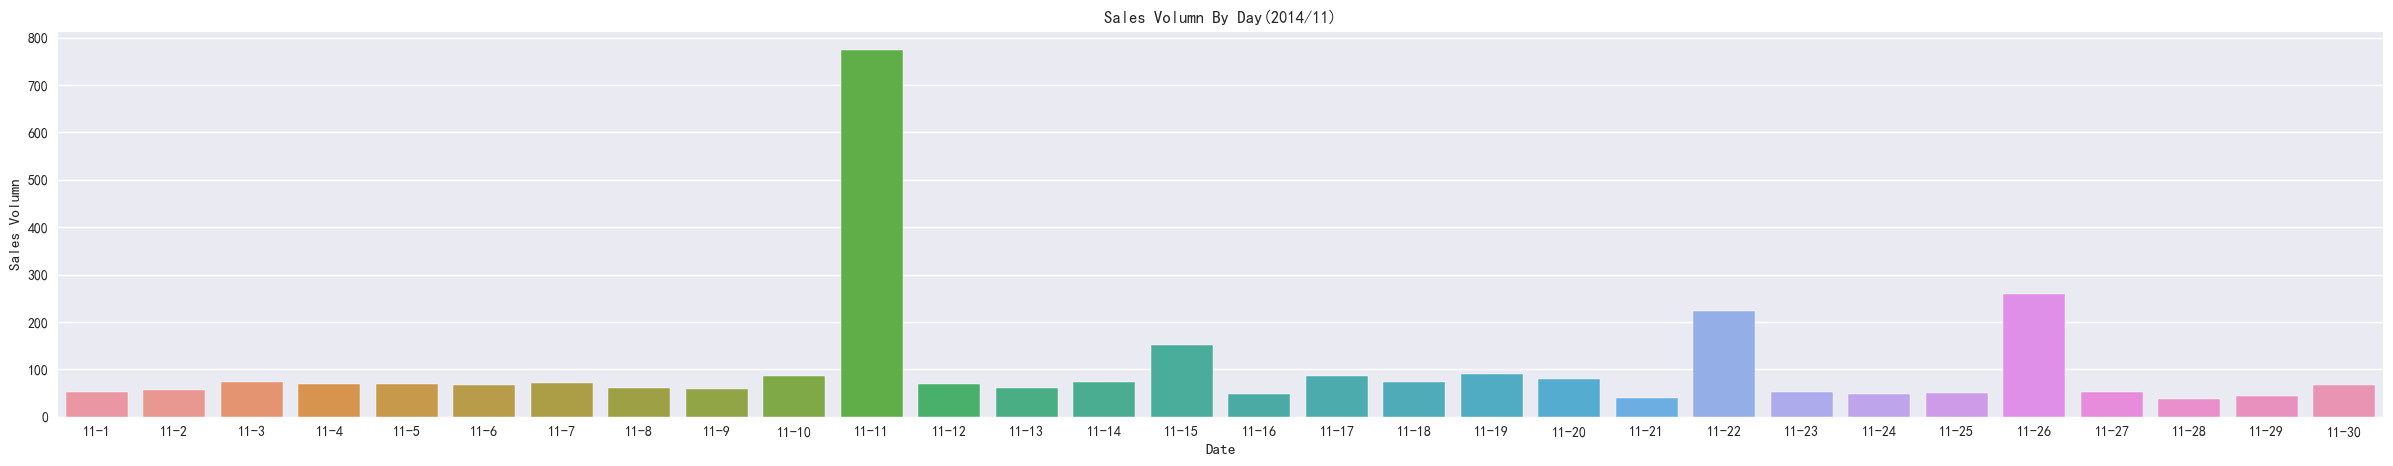

In [87]:
df_trade_201411 = df_trade[(df_trade.day >= '2014-11-01') & (df_trade.day <= '2014-11-30')]
day_stats = df_trade_201411.groupby(by='day')['buy_mount'].sum()

plt.figure(figsize=(30, 5))
x_list = [str(idx.month) + '-' + str(idx.day) for idx in day_stats.index]
y_list = [int(value) for value in day_stats.values]
sns.barplot(x=x_list, y=y_list)

plt.title("Sales Volumn By Day(2014/11)")
plt.xlabel("Date")
plt.ylabel("Sales Volumn")
plt.show()

<AxesSubplot: >

Text(0.5, 1.0, 'Sales Volumn By Year-Season')

Text(0.5, 0, '(Year,Season)')

Text(0, 0.5, 'Sales Volumn')

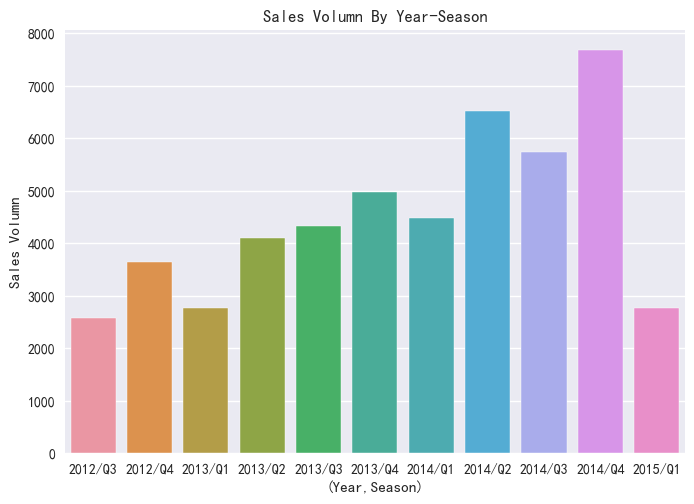

In [86]:
year_quarter_stats = df_trade.groupby(by=['year', 'quarter'])['buy_mount'].sum()
x_list = [str(idx[0]) + "/Q" + str(idx[1]) for idx in year_quarter_stats.index]
y_list = [int(value) for value in year_quarter_stats.values]
sns.barplot(x=x_list, y=y_list)
plt.title("Sales Volumn By Year-Season")
plt.xlabel("(Year,Season)")
plt.ylabel("Sales Volumn")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b302d708e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b302d70e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b302d70640>],
 'medians': [<matplotlib.lines.Line2D at 0x1b302d71360>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b302d71600>],
 'means': []}

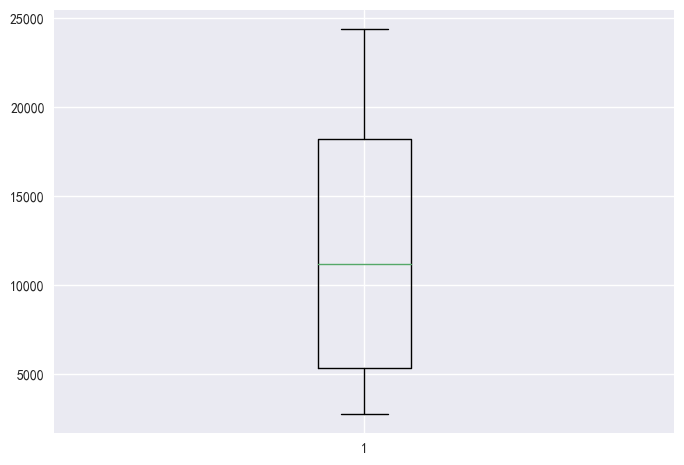

In [68]:
plt.boxplot(df_trade.groupby('year').agg({'buy_mount':sum}))

<AxesSubplot: xlabel='year'>

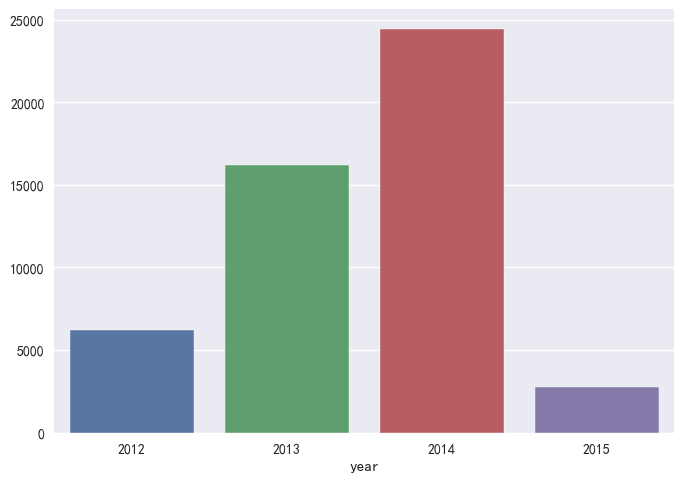

In [78]:
sns.barplot(x=stat.index,
            y=stat.values)

In [75]:
stat = df_trade.groupby('year')['buy_mount'].sum()

<AxesSubplot: xlabel='year'>

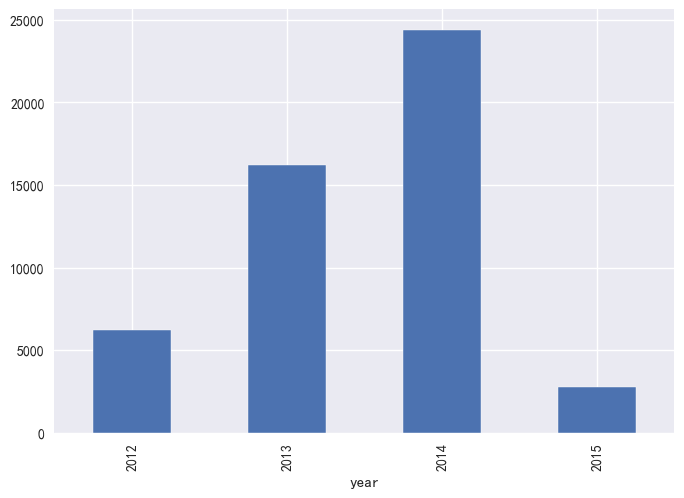

In [104]:
stat.plot(kind='bar')

In [60]:
df_baby = df_baby[df_baby.birthday > '2010-01-01']
df_baby.birthday.describe()

count                     798
unique                    669
top       2013-03-09 00:00:00
freq                        4
first     2010-01-05 00:00:00
last      2015-08-15 00:00:00
Name: birthday, dtype: object

In [59]:
df_baby['birthday'] = pd.to_datetime(df_baby.birthday.astype('str'))
df_baby.birthday.describe()

count                     927
unique                    793
top       2013-03-09 00:00:00
freq                        4
first     1984-06-16 00:00:00
last      2015-08-15 00:00:00
Name: birthday, dtype: object

In [58]:
df_baby = df_baby[df_baby.gender != 2]
df_baby

,user_id,birthday,gender
0,2757,20130311,1
1,415971,20121111,0
2,1372572,20120130,1
3,10339332,20110910,0
4,10642245,20130213,0
...,...,...,...
948,2020957900,20140430,0
949,2080304899,20100713,0
950,2114469016,20140416,0
951,2186831536,20140519,1


In [55]:
count_user = df_trade.user_id.nunique()
count_auction = df_trade.auction_id.nunique()
count_category_1 = df_trade.category_1.nunique()
count_category_2 = df_trade.category_2.nunique()
count_buy_mount = df_trade.buy_mount.sum()
print("用户数", count_user)
print("交易数", count_auction)
print("商品一级类目数：", count_category_1)
print("商品二级类目数：", count_category_2)
print("总销量：", count_buy_mount)

用户数 29913
交易数 28392
商品一级类目数： 6
商品二级类目数： 662
总销量： 49586


In [54]:
df_trade = df_trade[(df_trade.buy_mount >= 1) & (df_trade.buy_mount <= 189)]
df_trade.buy_mount.describe()

count    29940.000000
mean         1.656179
std          5.026888
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        176.000000
Name: buy_mount, dtype: float64

In [53]:
df_trade.buy_mount.describe()

count    29971.000000
mean         2.544126
std         63.986879
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      10000.000000
Name: buy_mount, dtype: float64

In [52]:
df_trade.day.describe()

count                   29971
unique                    949
top       2014-11-11 00:00:00
freq                      454
first     2012-07-02 00:00:00
last      2015-02-05 00:00:00
Name: day, dtype: object

In [49]:
df_trade['year'] = df_trade.day.dt.year
df_trade['quarter'] = df_trade.day.dt.quarter
df_trade['month'] = df_trade.day.dt.month

In [48]:
df_trade['day'] = pd.to_datetime(df_trade.day.astype('str'))

In [47]:
# 加载数据

df_trade = pd.read_csv('tianchi_mum_baby_trade_history.csv')

df_baby = pd.read_csv('tianchi_mum_baby.csv')

In [46]:
import seaborn as sns
import pyecharts.charts as pyc
import pyecharts.options as opts

In [45]:
pd.merge(train,baby,on='user_id').groupby(['gender']).agg({'category_2':len})

,category_2
gender,
0,492
1,438
2,26


In [40]:
pd.merge(train,baby,on='user_id').groupby(['gender']).agg({'buy_mount':(sum)})

,buy_mount
gender,
0,935
1,559
2,44


In [38]:
train2.groupby(['category_1','category_2']).agg({'buy_mount':(sum)})

buy_mount
category_1 category_2           
28         1662                1
           201826              7
           203319             24
           203320            398
           203322             90
...                          ...
122650008  50017921           14
           50132020           26
           121410024           6
           121424024           1
           121456020           1

[662 rows x 1 columns]

In [36]:
train2.groupby('category_1').agg({'buy_mount':(sum)})

,buy_mount
category_1,
28,28545
38,3666
50008168,18792
50014815,19763
50022520,3245
122650008,2239


In [35]:
train2.groupby('quarter').agg({'buy_mount':(sum)})

,buy_mount
quarter,
1,12842
2,12260
3,19544
4,31604


In [33]:
year_data = train2.groupby('year').agg({'buy_mount':(sum)})
year_data.head()

,buy_mount
year,
2012,6923
2013,22813
2014,42241
2015,4273


In [32]:
train2['year']=train2['day'].dt.year
train2['month']=train2['day'].dt.month
train2['date']=train2['day'].dt.day
train2['quarter']=train2['day'].dt.quarter
train2.head()

,user_id,auction_id,category_2,category_1,buy_mount,day,year,month,date,quarter
0,786295544,41098319944,50014866,50022520,2,2014-09-19,2014,9,19,3
1,532110457,17916191097,50011993,28,1,2013-10-11,2013,10,11,4
2,249013725,21896936223,50012461,50014815,1,2013-10-11,2013,10,11,4
3,917056007,12515996043,50018831,50014815,2,2014-10-23,2014,10,23,4
4,444069173,20487688075,50013636,50008168,1,2014-11-03,2014,11,3,4


In [31]:
train2 = train.copy()
train2['day']=pd.to_datetime(train2['day'].astype(str))
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29971 entries, 0 to 29970
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     29971 non-null  int64         
 1   auction_id  29971 non-null  int64         
 2   category_2  29971 non-null  int64         
 3   category_1  29971 non-null  int64         
 4   buy_mount   29971 non-null  int64         
 5   day         29971 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.4 MB


In [12]:
data =  pd.merge(train,baby,on='user_id',how='left')
data.head()

,user_id,auction_id,category_2,category_1,buy_mount,day,birthday,gender
0,786295544,41098319944,50014866,50022520,2,20140919,NaN,NaN
1,532110457,17916191097,50011993,28,1,20131011,NaN,NaN
2,249013725,21896936223,50012461,50014815,1,20131011,NaN,NaN
3,917056007,12515996043,50018831,50014815,2,20141023,NaN,NaN
4,444069173,20487688075,50013636,50008168,1,20141103,NaN,NaN


In [5]:
baby = pd.read_csv('tianchi_mum_baby.csv')
baby.head(2)

,user_id,birthday,gender
0,2757,20130311,1
1,415971,20121111,0


In [ ]:
print(1,2,2,)

In [4]:
train = pd.train = pd.read_csv('tianchi_mum_baby_trade_history.csv')
train.head()

,user_id,auction_id,category_2,category_1,buy_mount,day
0,786295544,41098319944,50014866,50022520,2,20140919
1,532110457,17916191097,50011993,28,1,20131011
2,249013725,21896936223,50012461,50014815,1,20131011
3,917056007,12515996043,50018831,50014815,2,20141023
4,444069173,20487688075,50013636,50008168,1,20141103


In [1]:
import os
os.chdir(r'C:\Users\fzh00\Desktop\文件\excel\阿里天池\母婴产品')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False